In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats  # for statistical tests
import seaborn as sns
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge


In [2]:
data = pd.read_csv("BKB_WaterQualityData_2020084.csv")

print(data.isnull().sum())  # Check for missing values

data.info()
data.describe()

Site_Id                       1
Unit_Id                    2339
Read_Date                     5
Salinity (ppt)              130
Dissolved Oxygen (mg/L)     851
pH (standard units)          95
Secchi Depth (m)             73
Water Depth (m)              71
Water Temp (?C)             121
Air Temp-Celsius           2286
Air Temp (?F)                71
Time (24:00)                 63
Field_Tech                   39
DateVerified               1918
WhoVerified                1918
AirTemp (C)                   0
Year                          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site_Id                  2370 non-null   object 
 1   Unit_Id                  32 non-null     object 
 2   Read_Date                2366 non-null   object 
 3   Salinity (ppt)           2241 non-null   float64
 4   Dissolv

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),AirTemp (C),Year
count,2241.000000,1520.000000,2276.000000,2298.000000,2300.000000,2250.000000,85.000000,2300.000000,2371.000000,2371.000000
mean,0.717068,6.646263,7.168212,0.524898,0.762559,18.062138,16.437647,62.051637,15.663050,2006.049346
std,1.230819,2.506608,0.788485,0.473663,0.621140,8.298246,11.754138,15.492236,10.314720,9.002373
min,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,0.000000,10.500000,-17.777778,1899.000000
25%,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,9.000000,49.000000,8.888889,2001.000000
50%,0.000000,6.500000,7.000000,0.400000,0.650000,19.000000,15.000000,63.000000,16.666667,2007.000000
75%,1.000000,8.500000,7.500000,0.650000,0.950000,25.000000,21.700000,75.000000,23.888889,2012.000000
max,9.000000,15.100000,9.900000,9.000000,12.000000,74.000000,74.000000,92.300000,33.500000,2019.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site_Id                  2370 non-null   object 
 1   Unit_Id                  32 non-null     object 
 2   Read_Date                2366 non-null   object 
 3   Salinity (ppt)           2371 non-null   float64
 4   Dissolved Oxygen (mg/L)  2371 non-null   float64
 5   pH (standard units)      2371 non-null   float64
 6   Secchi Depth (m)         2371 non-null   float64
 7   Water Depth (m)          2371 non-null   float64
 8   Water Temp (?C)          2371 non-null   float64
 9   Air Temp (?F)            2300 non-null   float64
 10  Time (24:00)             2308 non-null   object 
 11  Field_Tech               2332 non-null   object 
 12  DateVerified             453 non-null    object 
 13  WhoVerified              453 non-null    object 
 14  AirTemp (C)             

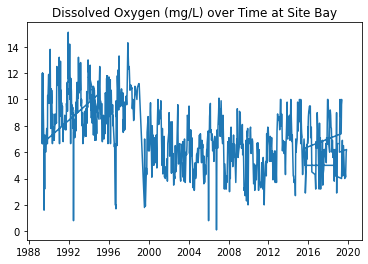

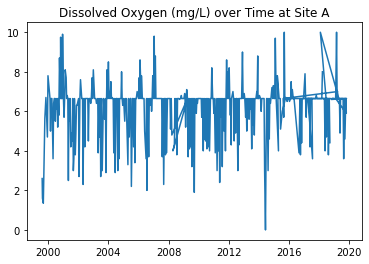

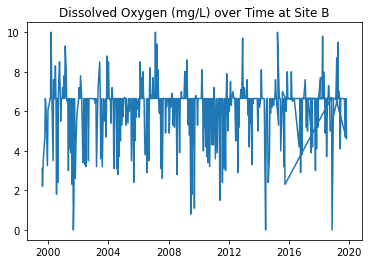

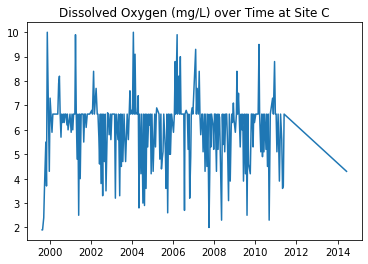

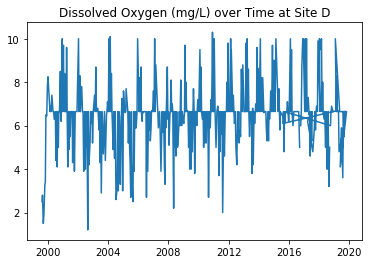

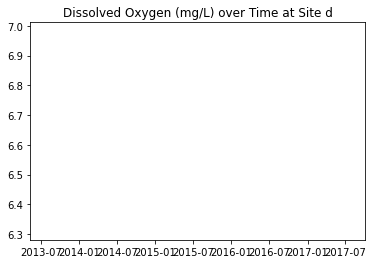

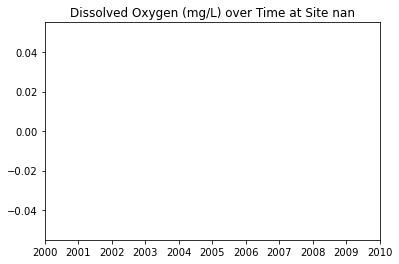

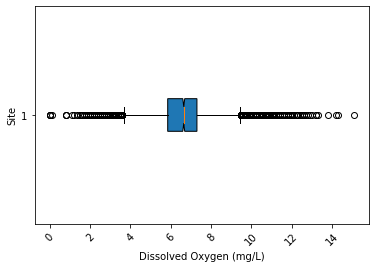

In [3]:
data["Salinity (ppt)"] = data["Salinity (ppt)"].fillna(data["Salinity (ppt)"].mean())
data["Dissolved Oxygen (mg/L)"] = data["Dissolved Oxygen (mg/L)"].fillna(data["Dissolved Oxygen (mg/L)"].mean())
data["pH (standard units)"] = data["pH (standard units)"].fillna(data["pH (standard units)"].mean())
data["Secchi Depth (m)"] = data["Secchi Depth (m)"].fillna(data["Secchi Depth (m)"].mean())
data["Water Depth (m)"] = data["Water Depth (m)"].fillna(data["Water Depth (m)"].mean())
data["Water Temp (?C)"] = data["Water Temp (?C)"].fillna(data["Water Temp (?C)"].mean())  # Assuming data is usable

# Drop unnecessary columns
data = data.drop(columns=["Air Temp-Celsius"])

# Explore data types and descriptive statistics
data.info()
data.describe()

# Time Series Analysis 
chosen_parameter = "Dissolved Oxygen (mg/L)"

data["Read_Date"] = pd.to_datetime(data["Read_Date"], format="%m/%d/%Y")


# Plot time series for each site
for site in data["Site_Id"].unique():
    site_data = data[data["Site_Id"] == site]
    plt.plot(site_data["Read_Date"], site_data[chosen_parameter])
    plt.title(f"{chosen_parameter} over Time at Site {site}")
    plt.show()
# Spatial Analysis (Example for Comparing pH across Sites):
plt.boxplot(data[chosen_parameter], vert=False, notch=True, patch_artist=True)
plt.xlabel(chosen_parameter)
plt.ylabel("Site")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



/tmp/ipykernel_26309/3924320363.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)
/tmp/ipykernel_26309/3924320363.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


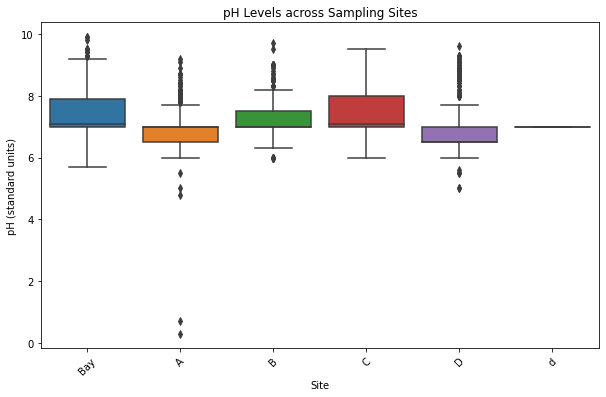

In [4]:
data.fillna(data.mean(), inplace=True)

# Spatial Analysis (Example for Comparing pH across Sites)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Site_Id', y='pH (standard units)', data=data)
plt.title('pH Levels across Sampling Sites')
plt.xlabel('Site')
plt.ylabel('pH (standard units)')
plt.xticks(rotation=45)
plt.show()



/tmp/ipykernel_26309/1499249438.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Read_Date'] = pd.to_datetime(cleaned_data['Read_Date'])


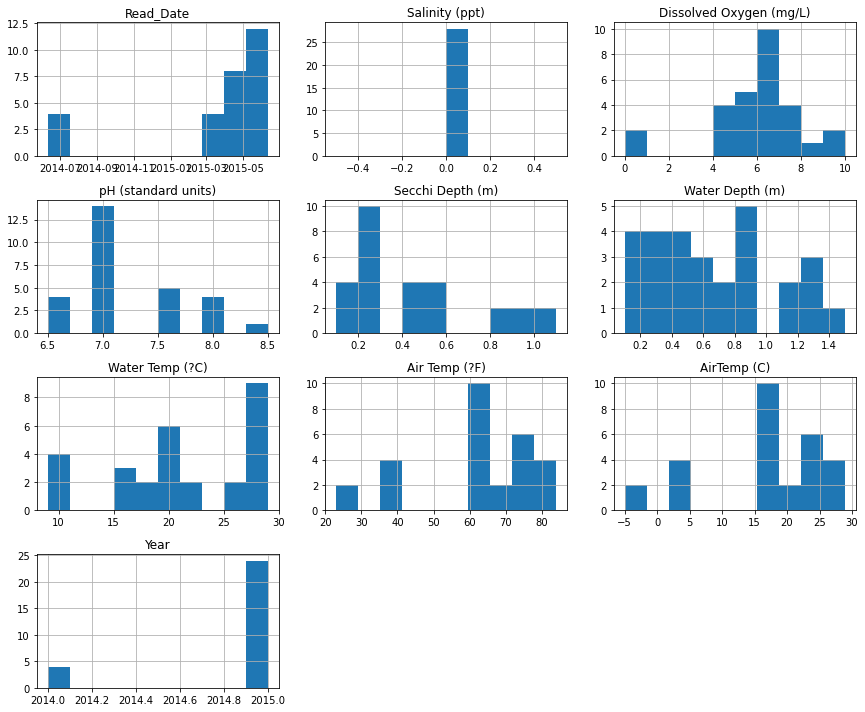

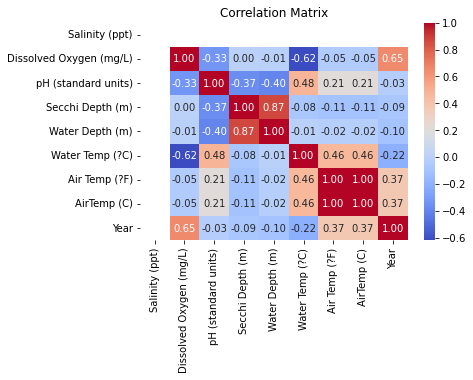

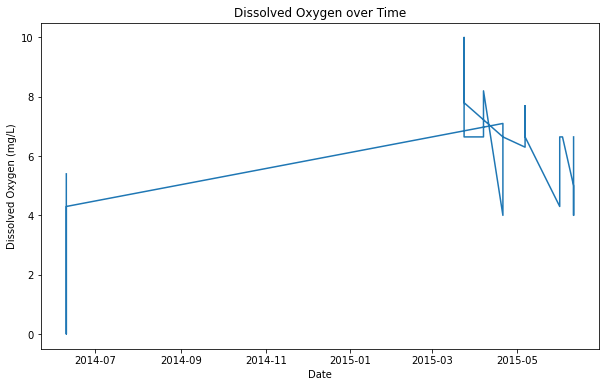

In [5]:

cleaned_data = data.dropna()  # Remove rows with missing values

# Data Transformation
cleaned_data['Read_Date'] = pd.to_datetime(cleaned_data['Read_Date'])

# Exploratory Data Analysis (EDA)
# Plot histograms for numerical variables
cleaned_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation Analysis
correlation_matrix = cleaned_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Plot time series for Dissolved Oxygen
plt.figure(figsize=(10, 6))
plt.plot(cleaned_data['Read_Date'], cleaned_data['Dissolved Oxygen (mg/L)'])
plt.title('Dissolved Oxygen over Time')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.show()



/tmp/ipykernel_26309/718095937.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


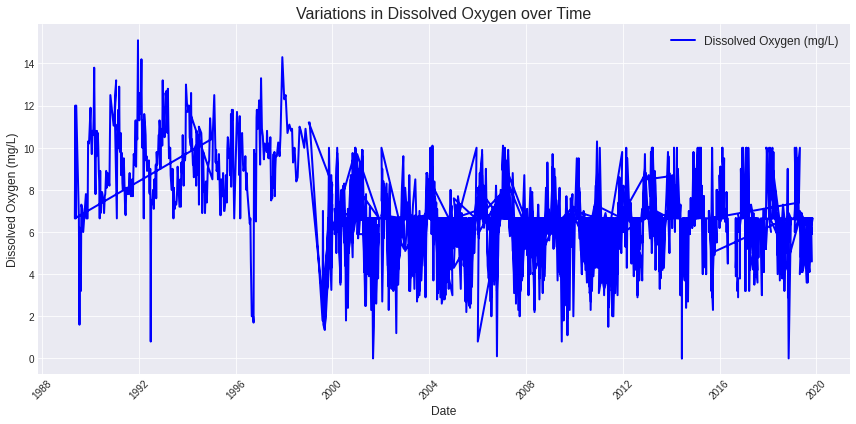

In [6]:
# Handle missing values by imputing with mean
data.fillna(data.mean(), inplace=True)

# Perform seasonal decomposition for time series analysis
result = seasonal_decompose(data['Dissolved Oxygen (mg/L)'], model='additive', period=12)

# Detect outliers using z-score
data['Dissolved_Oxygen_ZScore'] = zscore(data['Dissolved Oxygen (mg/L)'])
outliers = data[data['Dissolved_Oxygen_ZScore'].abs() > 3]

# Convert 'Read_Date' column to datetime format with error handling
try:
    data['Read_Date'] = pd.to_datetime(data['Read_Date'], format='%m/%d/%Y')
except ValueError:
    print("Error: Some values in 'Read_Date' column are not in the expected format.")

# 
plt.style.use('seaborn-darkgrid')

# Plot the variations in Dissolved Oxygen over time
plt.figure(figsize=(12, 6))
plt.plot(data['Read_Date'], data['Dissolved Oxygen (mg/L)'], label='Dissolved Oxygen (mg/L)', color='blue', linewidth=2)
plt.title('Variations in Dissolved Oxygen over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Dissolved Oxygen (mg/L)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()



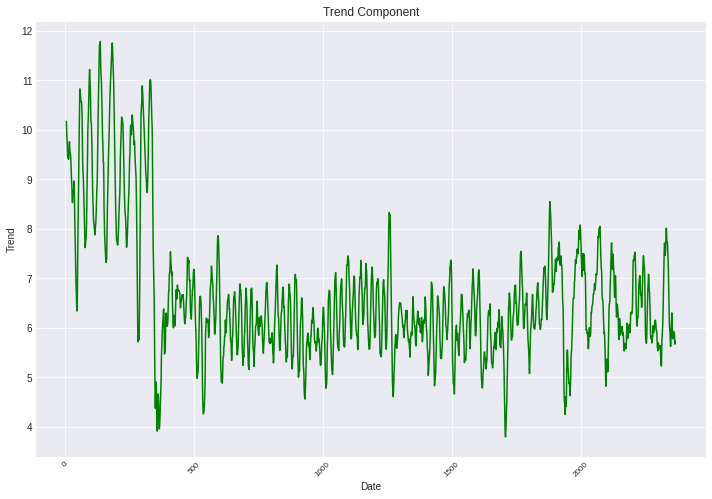

In [7]:
# Add seasonal decomposition plot
plt.figure(figsize=(12, 8))

result.trend.plot(color='green')
plt.title('Trend Component', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Trend', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)




Missing Values:
 Site_Id                       1
Unit_Id                    2339
Read_Date                     5
Salinity (ppt)                0
Dissolved Oxygen (mg/L)       0
pH (standard units)           0
Secchi Depth (m)              0
Water Depth (m)               0
Water Temp (?C)               0
Air Temp-Celsius              0
Air Temp (?F)                 0
Time (24:00)                 63
Field_Tech                   39
DateVerified               1918
WhoVerified                1918
AirTemp (C)                   0
Year                          0
Dissolved_Oxygen_ZScore       0
dtype: int64


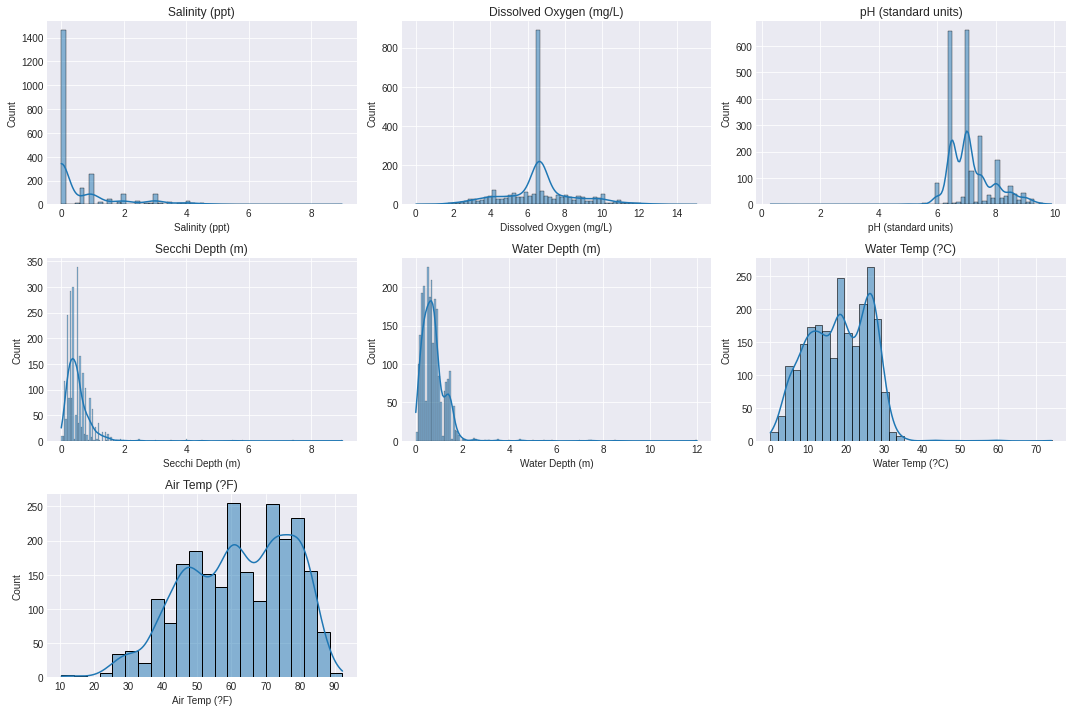


 Site_Id :
 Bay    794
D      440
B      437
A      434
C      264
d        1
Name: Site_Id, dtype: int64

 Unit_Id :
 01csv    28
01CSV     4
Name: Unit_Id, dtype: int64

 Field_Tech :
 Not Recorded                1225
S. Poe                       358
Sue Poe                      342
Feldman                      172
Susan Poe                     86
J Phillips, Mary Feldman      37
Strader, Pease, Feldman       35
Pease, Strader                31
John Phillips                 17
Strader                       15
Strader, S. Poe               11
sue Poe                        1
Sue POE                        1
Sue poe                        1
Name: Field_Tech, dtype: int64

 DateVerified :
 10/30/2019    60
11/12/2019    49
4/11/2017     40
8/7/2017      30
1/4/2016      26
3/27/2014     24
11/5/2019     21
5/8/2015      16
10/29/2019    15
10/17/2017    15
7/10/2014      8
1/13/2015      8
11/6/2019      8
10/31/2019     8
11/17/2017     8
2/10/2015      8
2/29/2016      8
9/11/2014   

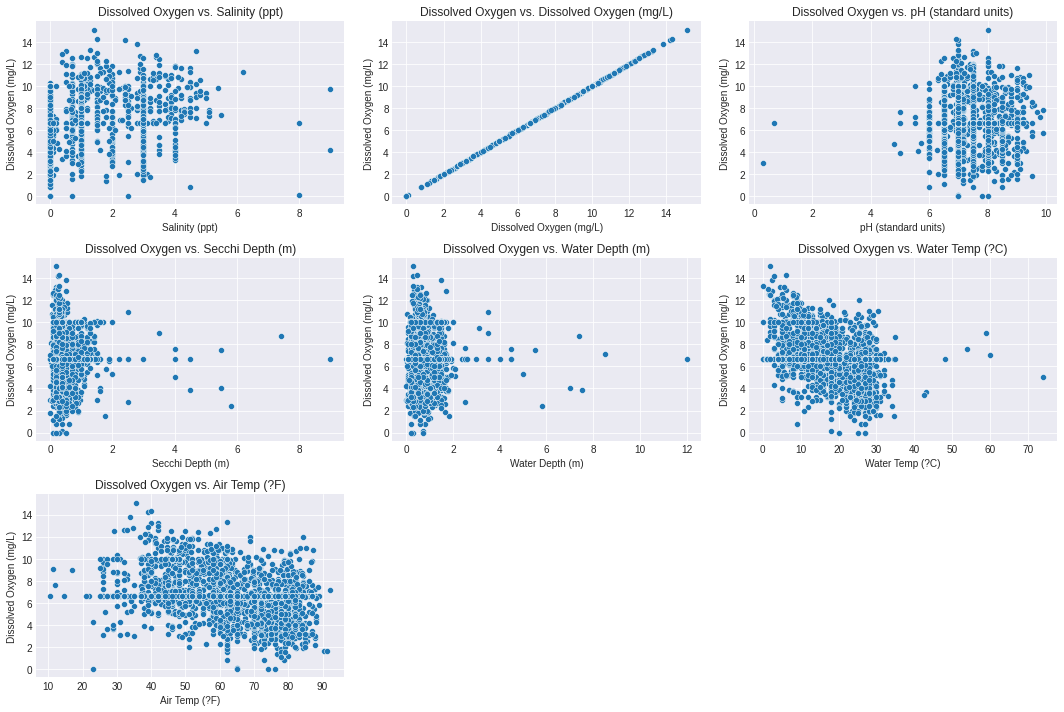

In [8]:
# Check for missing 
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values by imputing with mean for numerical columns
numerical_columns = ['Salinity (ppt)', 'Dissolved Oxygen (mg/L)', 'pH (standard units)', 
                     'Secchi Depth (m)', 'Water Depth (m)', 'Water Temp (?C)', 'Air Temp (?F)']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Explore numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Explore categorical variables
categorical_columns = ['Site_Id', 'Unit_Id', 'Field_Tech', 'DateVerified', 'WhoVerified']
for column in categorical_columns:
    print("\n", column, ":\n", data[column].value_counts())

# Visualize relationships
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=column, y='Dissolved Oxygen (mg/L)', data=data)
    plt.title(f'Dissolved Oxygen vs. {column}')
plt.tight_layout()
plt.show()
